# Machine Learning : Toolbox, Interface, Use-Case
    (Ref. St-18-0300).

Ce code est composé de deux parties : 
    * un exemple de scikit-learn provenant de la documentation officielle
    * le TP
Votre travail sera évalué en lancant l'intégralité du script.

Petits rappels : il faut commenter son code, mais pas trop ! ;) 
    


## Scikit Learn Package Example

Code extrait de :
    http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

Automatically created module for IPython interactive environment


/home/j61678/soft/anaconda3/envs/tp_stage/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/j61678/soft/anaconda3/envs/tp_stage/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/j61678/soft/anaconda3/envs/tp_stage/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


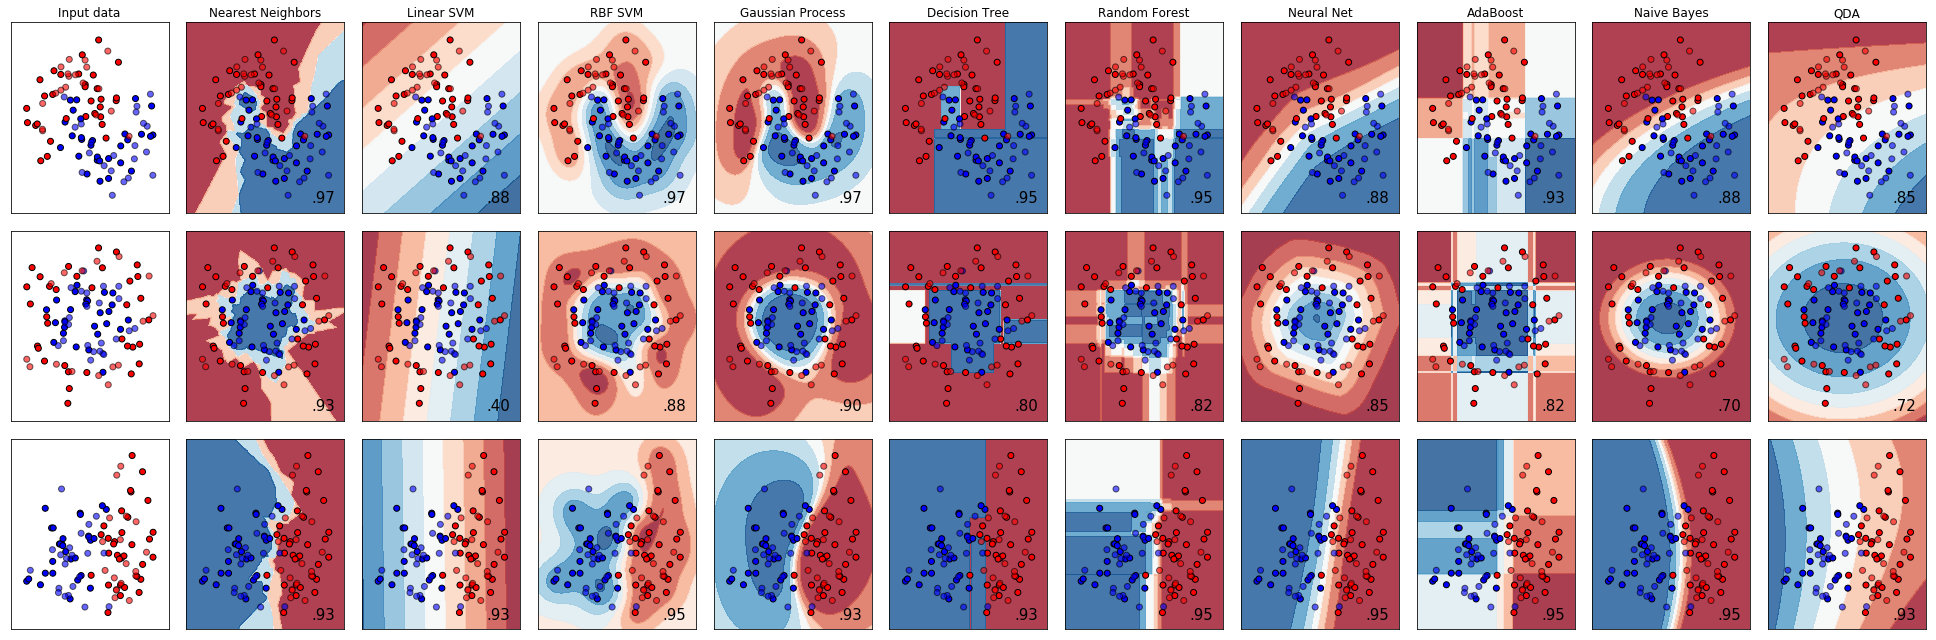

In [6]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
%matplotlib inline

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

## TP
Il vous faudra faire les "import" des packages nécessaires à votre travail (en plus des "import" déjà effectués dans l'exemple).

### étape 0 : import des packages :

In [2]:
# import ...

### étape 1.1 : importer les données
vous trouverez à l'adresse [data.pickle](https://github.com/jorisgu/tp_evaluation_python_edf/raw/master/data.pickle) le fichier pickle contenant un dictionnaire python contenant les variables nécessaires :
* X_train
* Y_train
* X_test
* Y_test

Vous appliquerez l'entraînement des modèles sur les données d'entraînement et l'évaluation sur les données de test...

Chaque ligne correspond à un exemple, X contenant les vecteurs représentatifs des données et Y les classes.

In [3]:
# with ...
#     data = ...
# X_train = ...

### étape 1.2 : préparation des données
Utiliser l'algorithme de PCA de scikit-learn pour réduire la dimension des vecteurs de X à 3 features.

In [4]:
# X_train_pca = ...

### étape 2 : visualiser les données
Package de visualisation au choix (matplotlib, pyplot, ....)

avec un peu de couleurs...

### étape 3 : méthode non supervisée
appliquer **deux** méthodes de clustering de votre choix (par exemple k-means et DBSCAN)

### étape 4 : méthode supervisée
appliquer **deux** méthodes d'apprentissage supervisées (dont une à base de [MLP](http://scikit-learn.org/stable/modules/neural_networks_supervised.html))

### étape 5 : évaluation
Pour l'ensemble des 4 méthodes produites, évaluer la performance du modèle sur les données de test avec une métrique de votre choix.

### étape 6 : question ouverte 
En analysant les caractéristiques de votre modèle de PCA, indiquer combien de dimensions sont réellement nécessaires pour représenter 75% de l'information d'entraînement.

### étape 7 : question facultative
Proposer un code qui utilise le package flask, qui sert une page web affichant votre nom, votre prénom, un lien qui mène vers [http://scikit-learn.org](http://scikit-learn.org) et qui affiche une figure de votre choix.

### étape 8 : soumission
Envoyer votre script python ou votre notebook à mon adresse : [joris.guerry@edf.fr](mailto:joris.guerry@edf.fr)